In [2]:
import sklearn as sk
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from demo.ojml.nn import NeuralNetwork

In [15]:
def center_data(data):
    mean = np.mean(data)
    centered_data = np.zeros(len(data))
    for i in range(0,len(data)):
        centered_data[i] = data[i] - mean
    return centered_data

def scale_data(data):
    min_val = min(data)
    max_val = max(data)
    scaled_data = np.zeros(len(data))
    for i in range(0,len(data)):
        scaled_data[i] = (data[i] - min_val)/(max_val - min_val)
    return scaled_data
# not used
"""def standardize_data(data):
    stand_data = np.zeros(len(data))
    std = np.std(data)
    mean = np.mean(data)
    for i in range(0, len(data)):
        stand_data[i] = (data[i] - mean)/std
    return stand_data
"""
def RMSE(y_pred, y_actual):
    mse = mean_squared_error(y_actual, y_pred)
    rmse = sqrt(mse)
    return rmse

def split(dataframe, split = 0.7, seed=0):
    np.random.seed(seed)
    rand = np.random.rand(len(data_df)) < split
    
    train = dataframe[rand]
    test = dataframe[~rand]
    
    return train, test

In [33]:
rtr = RandomForestRegressor(n_estimators = 10, random_state = 42, max_depth = 10)

In [34]:
#read data from csv
data_df = pd.read_csv('../raw_data/SAM_timeseries_data.csv', sep=';')
data_df = data_df.loc[0:2480]



In [35]:
data_lst = list()

for i in range(1,8,1):
    sensor_arr = data_df.iloc[:,i]
    sensor_arr = center_data(sensor_arr)
    sensor_arr = scale_data(sensor_arr)
    data_lst.append(sensor_arr)


In [36]:
dataset = pd.DataFrame({'metal_ladle':data_lst[0], 'slag_ladle': data_lst[1],'cell1':data_lst[2],
                       'cell2': data_lst[3], 'cell3':data_lst[4], 'cell4':data_lst[5], 'level': data_lst[6]})
dataset

,metal_ladle,slag_ladle,cell1,cell2,cell3,cell4,level
0,0.358563,0.568000,0.504319,0.396209,0.343268,0.516085,0.984285
1,0.358174,0.568789,0.504715,0.394168,0.341435,0.516930,0.866621
2,0.361801,0.568693,0.506015,0.395405,0.345439,0.516048,0.984315
3,0.356716,0.567798,0.503930,0.390127,0.341371,0.516550,0.758125
4,0.361936,0.568018,0.504350,0.398338,0.345034,0.515812,0.984266
...,...,...,...,...,...,...,...
2474,0.324147,0.371091,0.396966,0.293046,0.350171,0.339975,0.623321
2475,0.322129,0.371107,0.396248,0.287513,0.349538,0.341229,0.623195
2476,0.324110,0.371623,0.394948,0.295530,0.350429,0.342003,0.623130
2477,0.321535,0.372685,0.393182,0.293141,0.348308,0.344040,0.622990


In [37]:
z_score = zscore(dataset)
abs_z_score = np.abs(z_score)
removed_outlier = (abs_z_score < 3).all(axis=1)
filt_dataset = dataset[removed_outlier]
filt_dataset

,metal_ladle,slag_ladle,cell1,cell2,cell3,cell4,level
0,0.358563,0.568000,0.504319,0.396209,0.343268,0.516085,0.984285
1,0.358174,0.568789,0.504715,0.394168,0.341435,0.516930,0.866621
2,0.361801,0.568693,0.506015,0.395405,0.345439,0.516048,0.984315
3,0.356716,0.567798,0.503930,0.390127,0.341371,0.516550,0.758125
4,0.361936,0.568018,0.504350,0.398338,0.345034,0.515812,0.984266
...,...,...,...,...,...,...,...
2474,0.324147,0.371091,0.396966,0.293046,0.350171,0.339975,0.623321
2475,0.322129,0.371107,0.396248,0.287513,0.349538,0.341229,0.623195
2476,0.324110,0.371623,0.394948,0.295530,0.350429,0.342003,0.623130
2477,0.321535,0.372685,0.393182,0.293141,0.348308,0.344040,0.622990


In [38]:
data_train, data_test = split(filt_dataset, split=0.7)

#split data into test and train
X_train = data_train.iloc[:, 0:6].values
y_train = data_train.iloc[:, 6].values

X_test = data_test.iloc[:, 0:6].values
y_test = data_test.iloc[:, 6].values

In [25]:
rtr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)

In [26]:
predictions = rtr.predict(X_test)
y_train_pred = rtr.predict(X_train)

In [27]:
rmse_test = RMSE(predictions, y_test)
rmse_train = RMSE(y_train_pred, y_train)

print(f'RMSE Test: {round(rmse_test,2)}')
print(f'RMSE Train: {round(rmse_train,2)}')

score_train = rtr.score(X_train, y_train)
score_test = rtr.score(X_test, y_test)

print(f'Train Accuracy: {round(score_train,2)*100}% Test Accuracy: {round(score_test,2)*100}%')

RMSE Test: 0.32
RMSE Train: 0.25
Train Accuracy: 50.0% Test Accuracy: 7.000000000000001%


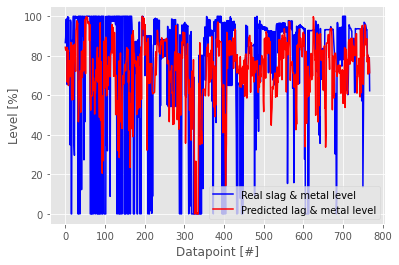

In [28]:
plt.style.use('ggplot')
plt.figure()
plt.plot(y_test*100, label = 'Real slag & metal level', color='blue')
plt.plot(predictions*100, label = 'Predicted lag & metal level', color='red')
plt.ylabel('Level [%]')
plt.xlabel('Datapoint [#]')

plt.legend()
plt.savefig('test.png')

In [130]:
nn = NeuralNetwork([X_train.shape[1],32,16,2], alpha=0.5)
nn.fit(X_train, y_train, epochs=10000)

ValueError: operands could not be broadcast together with shapes (1711,2) (1,1711) 

In [29]:
from keras.models import Sequential
from keras.layers import Dense

In [39]:
model = Sequential()
model.add(Dense(units=5, input_dim=6, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [40]:
model.fit(X_train, y_train, batch_size=20, epochs=100, verbose=1)

Epoch 1/100
86/86 [==============================] - 0s 931us/step - loss: 0.5255
Epoch 2/100
86/86 [==============================] - 0s 949us/step - loss: 0.2132
Epoch 3/100
86/86 [==============================] - 0s 974us/step - loss: 0.1486
Epoch 4/100
86/86 [==============================] - 0s 963us/step - loss: 0.1344
Epoch 5/100
86/86 [==============================] - 0s 956us/step - loss: 0.1258
Epoch 6/100
86/86 [==============================] - 0s 936us/step - loss: 0.1213
Epoch 7/100
86/86 [==============================] - 0s 990us/step - loss: 0.1197
Epoch 8/100
86/86 [==============================] - 0s 973us/step - loss: 0.1196
Epoch 9/100
86/86 [==============================] - 0s 995us/step - loss: 0.1193
Epoch 10/100
86/86 [==============================] - 0s 1ms/step - loss: 0.1193
Epoch 11/100
86/86 [==============================] - 0s 1ms/step - loss: 0.1195
Epoch 12/100
86/86 [==============================] - 0s 1ms/step - loss: 0.1193
Epoch 13/100
86/86 

In [41]:
y_pred_nn = model.predict(X_test, batch_size=32)
y_pred_train_nn = model.predict(X_train, batch_size=32)

In [42]:
y_pred_nn[:,0]

array([0.72366   , 0.7228073 , 0.72315097, 0.7227029 , 0.72222275,
       0.76433885, 0.76720005, 0.76672965, 0.7672665 , 0.76458865,
       0.69736594, 0.66957086, 0.63517404, 0.653378  , 0.80799127,
       0.7538272 , 0.75409454, 0.80330604, 0.826801  , 0.75563896,
       0.70567673, 0.74899954, 0.74950343, 0.7512813 , 0.7522722 ,
       0.75495106, 0.76601446, 0.7731379 , 0.7715902 , 0.7730996 ,
       0.7717843 , 0.7727152 , 0.7242155 , 0.7151051 , 0.70744056,
       0.692554  , 0.6634743 , 0.64571065, 0.6369626 , 0.63423616,
       0.6523055 , 0.6564195 , 0.65447813, 0.65600735, 0.6556528 ,
       0.65593755, 0.71708286, 0.7420588 , 0.74118084, 0.7385668 ,
       0.7482215 , 0.7485482 , 0.7531301 , 0.7503217 , 0.75558233,
       0.7566415 , 0.7579263 , 0.7576441 , 0.7578363 , 0.7585185 ,
       0.75921565, 0.7589327 , 0.7611825 , 0.7750628 , 0.77122515,
       0.71532357, 0.71424615, 0.713829  , 0.71428126, 0.7115084 ,
       0.7112914 , 0.7270983 , 0.7130456 , 0.71765417, 0.71784

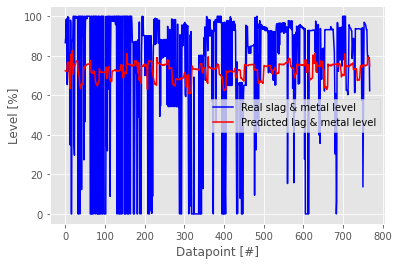

In [44]:
plt.style.use('ggplot')
plt.figure()
plt.plot(y_test*100, label = 'Real slag & metal level', color='blue')
plt.plot(y_pred_nn*100, label = 'Predicted lag & metal level', color='red')
plt.ylabel('Level [%]')
plt.xlabel('Datapoint [#]')

plt.legend()

